# **Importing Packages**

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# **Adding Noise to the image**

In [2]:
def add_noise(image, noise_type):
    """
    Add different types of noise to the image
    """
    noisy_image = np.copy(image)

    if noise_type == "gaussian":
        row, col = image.shape
        mean = 0
        sigma = 25
        gauss = np.random.normal(mean, sigma, (row, col))
        noisy_image = image + gauss

    elif noise_type == "salt_pepper":
        prob = 0.05
        threshold = 1 - prob
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                rdn = np.random.random()
                if rdn < prob:
                    noisy_image[i][j] = 0
                elif rdn > threshold:
                    noisy_image[i][j] = 255

    elif noise_type == "poisson":
        noisy_image = np.random.poisson(image).astype(float)

    elif noise_type == "speckle":
        row, col = image.shape
        gauss = np.random.randn(row, col)
        noisy_image = image + image * gauss

    return np.clip(noisy_image, 0, 255).astype(np.uint8)

In [3]:
def plot_noisy_images(noisy_images, noise_types):
    """
    Plot all noisy images in a separate figure
    """
    n_images = len(noisy_images)
    rows = (n_images + 3) // 4  # Ceiling division to determine number of rows

    plt.figure(figsize=(15, 4 * rows))
    for idx, (img, noise_type) in enumerate(zip(noisy_images, noise_types), 1):
        plt.subplot(rows, 4, idx)
        plt.imshow(img, cmap='gray')
        plt.title(f'Noise Type:\n{noise_type}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# **Main Method**

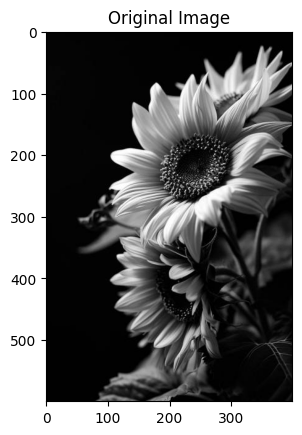

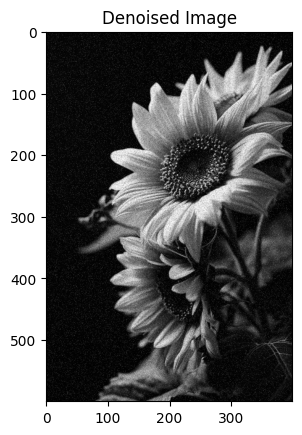


Displaying all noisy versions...


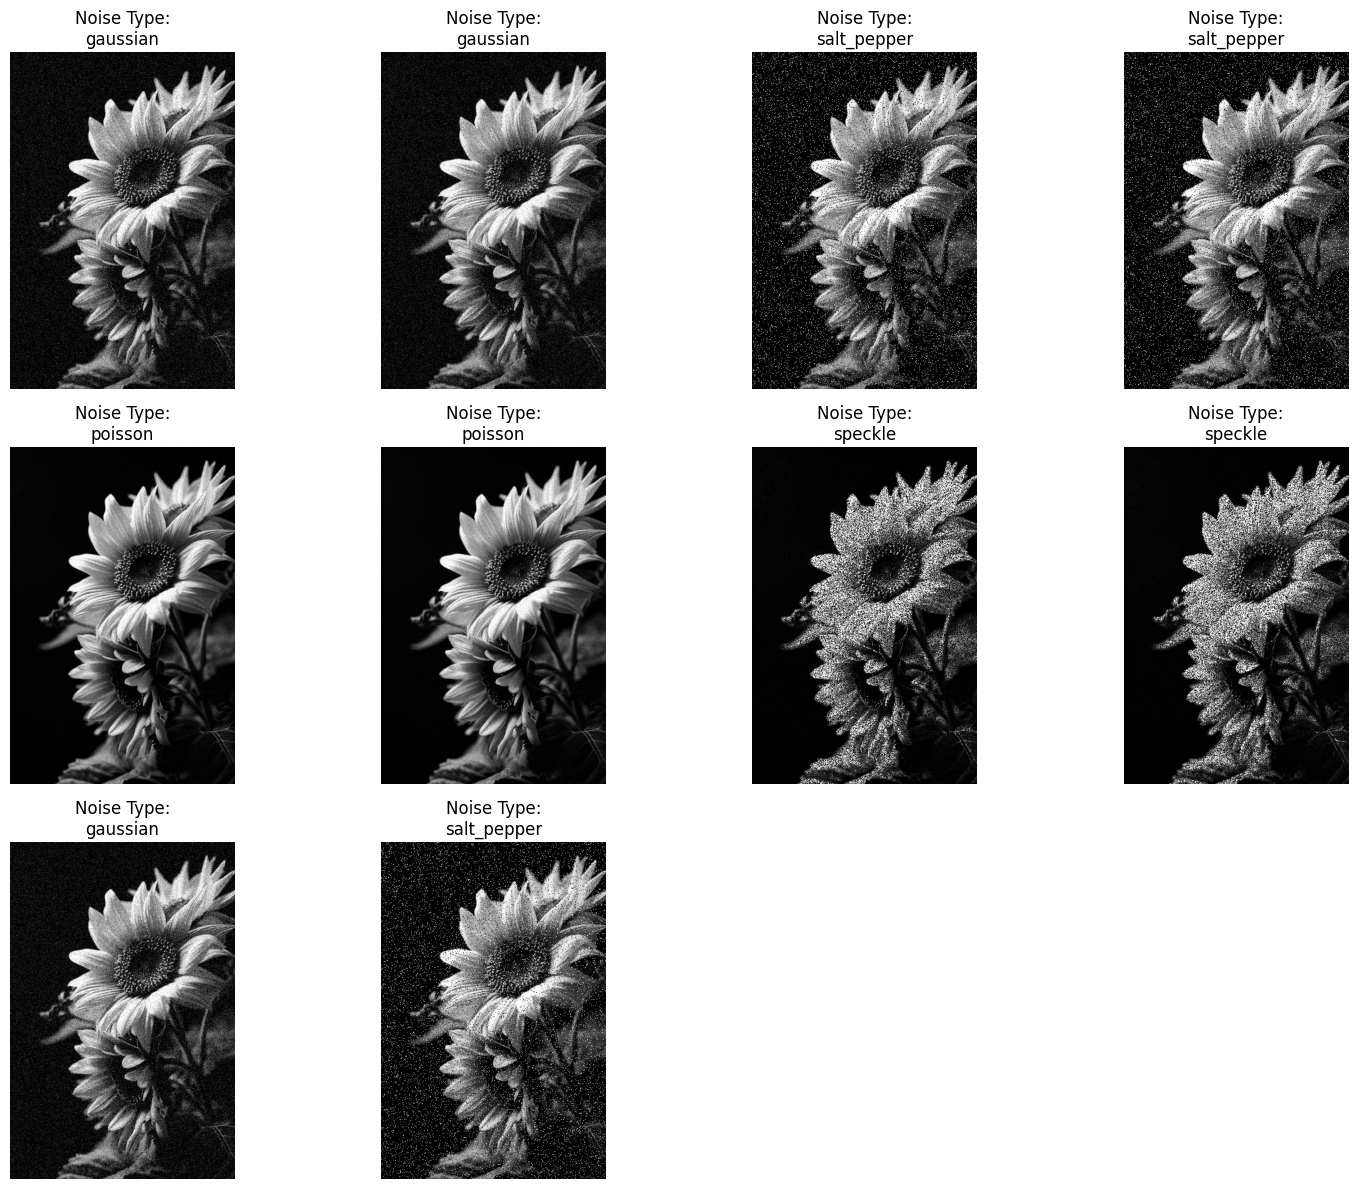

In [4]:
if __name__ == "__main__":
    #Input image path
    image_path = '/content/flower.jpg'

    # Read and display an image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.show()

    # List of noise types to apply
    noise_types = [
        "gaussian", "gaussian", "salt_pepper", "salt_pepper",
        "poisson", "poisson", "speckle", "speckle",
        "gaussian", "salt_pepper"
    ]

    # Create noisy copies
    noisy_images = []
    for noise_type in noise_types:
        noisy = add_noise(image, noise_type)
        noisy_images.append(noisy)

    # Average all noisy images for denoising
    averaged_image = np.mean(noisy_images, axis=0).astype(np.uint8)

    # Display output image
    output_image_path = image_path[:-4]+'_denoised_output_image.jpg'
    cv2.imwrite(output_image_path, averaged_image)
    plt.imshow(averaged_image, cmap='gray')
    plt.title("Denoised Image")
    plt.show()

    # Plot all noisy images separately
    print("\nDisplaying all noisy versions...")
    plot_noisy_images(noisy_images, noise_types)
